<a href="https://colab.research.google.com/github/ydicsey/ipynb_code/blob/main/pathTracing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

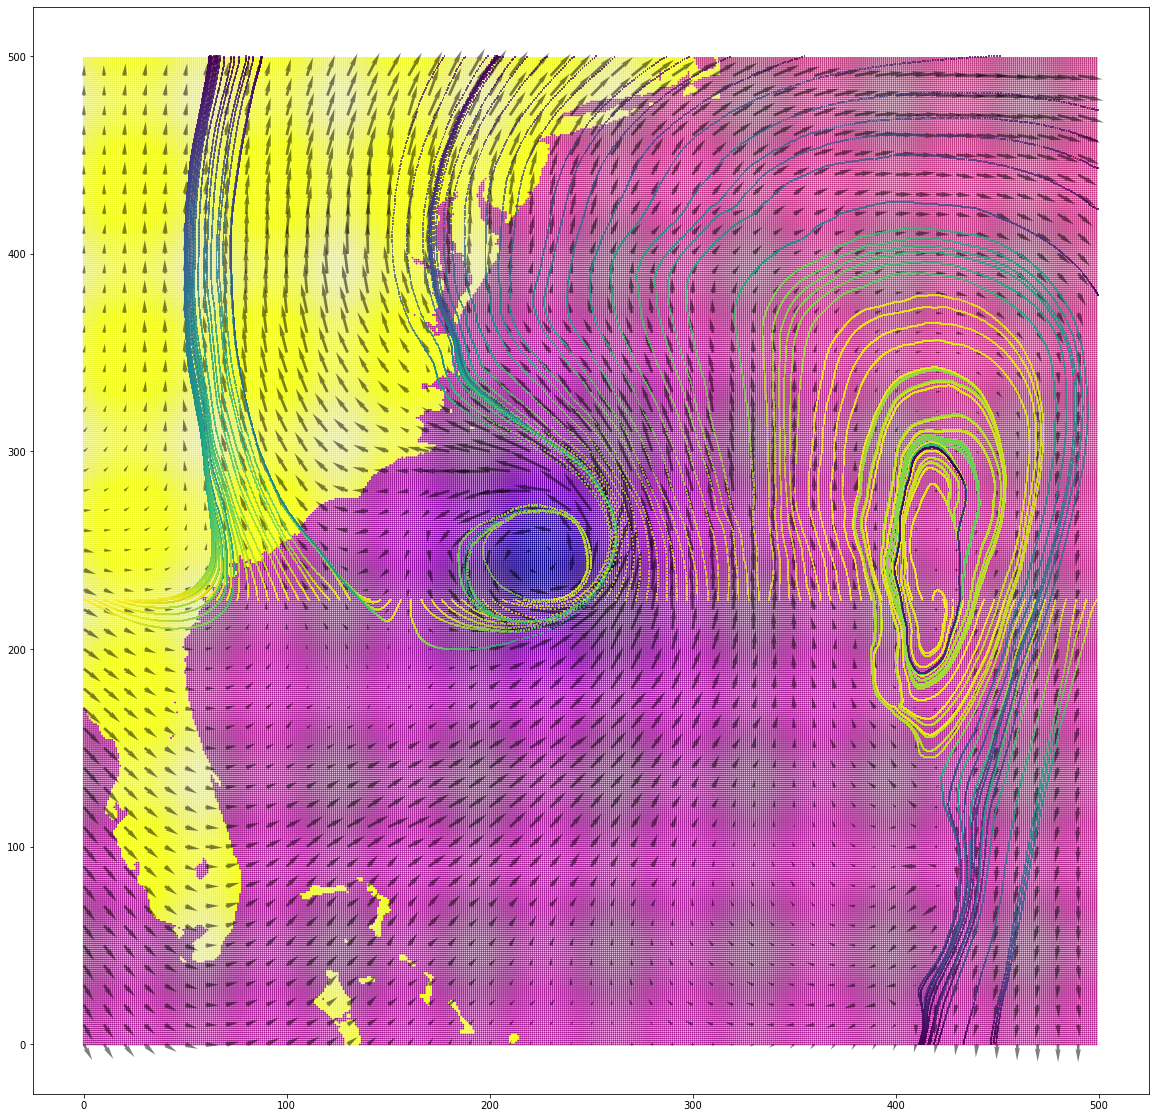

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import math
import itertools

uData = []
vData = []

##### data loading and setup/plot image
##### argument "showBgMap": show or not to show the background map
##### DO NOT modify this function
def Initialize( showBgMap = False ):
    global uData
    global vData
    
    loadFlowData = np.load("flowData.npy", allow_pickle=True)

    ### flow data
    uData = loadFlowData.item().get('uData')
    vData = loadFlowData.item().get('vData')

    plt.rcParams['figure.figsize'] = [20, 20]
    
    ### plot backgroup images
    presMapX = loadFlowData.item().get('presMapX')
    presMapY = loadFlowData.item().get('presMapY')
    presMapV = loadFlowData.item().get('presMapV')
    if showBgMap == True:
        plt.scatter(presMapX, presMapY, s=1, c=presMapV, cmap='plasma')
    
    ### plot arrows
    x_pos = loadFlowData.item().get('x_pos')
    y_pos = loadFlowData.item().get('y_pos')
    x_direct = loadFlowData.item().get('x_direct')
    y_direct = loadFlowData.item().get('y_direct')       
    plt.quiver(x_pos, y_pos, x_direct, y_direct, scale = 50,  headwidth = 2, headlength = 5, alpha = 0.5)


##### x, y: location. Return: 2D vector at [x,y] (x and y are integer only)
##### return: a 2D vector [u, v], u is horizontal direction (right is postivie), v is the vertical direction (up is positive)
##### DO NOT modify this function
def getDataVector(x, y):
    return uData[(499-y)+500*x], vData[(499-y)+500*x]


##### this function generates "numSeeds" points(seeds) from [startX, startY] to [endX, endY]
##### Return: seeds -> a list of [x, y] 
def generateSeeds(startX, startY, endX, endY, numSeeds):
    seeds = []
    x = np.linspace(startX, endX, numSeeds )
    y = np.linspace(startY, endY, numSeeds )
    seeds = np.zeros([numSeeds,2])
    seeds[:, 0] = x
    seeds[:, 1] = y
    return seeds

##### this function plot a particle tracing result on the screen
##### argument "path": particle tracing result. It is represetned by a list of [x, y]. (x, y) can be floating point
##### You may not want to modify this function
def drawOneParticleTracingResult( path ):
    ps = np.array(path)
    c = np.linspace(1, 0, num=ps.shape[0])
    plt.scatter(ps[:,0], ps[:,1], c=c, s=3, marker='_')

##### (TODO) WORK on this function
##### compute ONE particle tracing result
##### you should use "getDataVector())" to get the vector you want on the grid point
##### if you need the vector between grid points, you have to implment the vector interpolation by your self
##### I do not mind the computation is efficnet or not
##### "seed": one seed (x,y)
##### "t": delta t (i suggest 0.025)
##### "steps": how many stesp for this particle tracing process
def particleTrace(seed, t, steps):
    # print("implment your path tracing algorithm here!!!")
    ans = []
    x = seed[0]
    y = seed[1]
    ans.append([x, y])
    for i in range(steps-1):
        tmp = []
        a_u = 2 * t * f_u(x, y)
        a_v = 2 * t * f_v(x, y)
        b_u = 2 * t * f_u(x + a_u/2, y + a_v/2)
        b_v = 2 * t * f_v(x + a_u/2, y + a_v/2)
        c_u = 2 * t * f_u(x + b_u/2, y + b_v/2)
        c_v = 2 * t * f_v(x + b_u/2, y + b_v/2)
        d_u = 2 * t * f_u(x + c_u/2, y + c_v/2)
        d_v = 2 * t * f_v(x + c_u/2, y + c_v/2)
        # print(a_u, a_v, b_u, b_v, c_u, c_v, d_u, d_v)
        x += (a_u + 2*b_u + 2*c_u + d_u) /6
        y += (a_v + 2*b_v + 2*c_v + d_v) /6
        if x > 500 or y > 500 or x < 0 or y < 0:
            break
        #　print(type(x))
        tmp.append(x.tolist())
        tmp.append(y.tolist())
        tmp = list(itertools.chain.from_iterable(tmp))
        ans.append(tmp)
    return ans
        # print(type(x))
        
##### main (if you want, you can change the arguments in the generateSeeds() and the last argument in particleTrace() )
Initialize(True) ## set False to disable backgroup image display (faster a little bit)

##### prepare for interpolation
valueU = []
valueV = []
x = []
y = []
for i in range(500):
    x.append(i)
    y.append(i)
    for j in range(500):
        valueU.append(getDataVector(i, j)[0])
        valueV.append(getDataVector(i, j)[1])
f_u = interpolate.interp2d(x, y, valueU, kind='linear')
f_v = interpolate.interp2d(x, y, valueV, kind='linear')

seeds = generateSeeds(0, 225, 499, 225, 100) ##this line generates seeds (seeds to generate the graph on the homework description slides)
    
for seed in seeds: ###iterate through all seeds
    path = particleTrace(seed, 0.025, 10000) # compute one particle tracing of the "seed", result is a list of [x,y ]
    drawOneParticleTracingResult(path) # draw one particle path

plt.show()